In [1]:
import requests

url = 'https://content.guardianapis.com/search'
payload = {'q':'UFO', 
           'api-key':'25ce3607-2201-4dac-9ccb-d887c3784d5e'}

r = requests.get(url, payload)

r.status_code

N = r.json()['response']['pages']
all = []


url = 'https://content.guardianapis.com/search'
payload = {'q':'UFO', 
           'api-key':'25ce3607-2201-4dac-9ccb-d887c3784d5e',
           'order-by':'oldest',
          'page':'9'}


for i in range(1,N+1):
    payload['page'] = str(i)
    r = requests.get(url, payload)
    page = r.json()['response']['results']
    all.extend(page)
    

In [8]:
all[0]

{'id': 'uk/1989/jun/14/2',
 'type': 'article',
 'sectionId': 'uk-news',
 'sectionName': 'UK news',
 'webPublicationDate': '1989-06-14T10:26:21Z',
 'webTitle': 'Guardian Tomorrows: Toxicity on tap',
 'webUrl': 'https://www.theguardian.com/uk/1989/jun/14/2',
 'apiUrl': 'https://content.guardianapis.com/uk/1989/jun/14/2',
 'isHosted': False,
 'pillarId': 'pillar/news',
 'pillarName': 'News'}

In [9]:
import pandas as pd

In [26]:
df = pd.DataFrame(all)

In [27]:
df

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,uk/1989/jun/14/2,article,uk-news,UK news,1989-06-14T10:26:21Z,Guardian Tomorrows: Toxicity on tap,https://www.theguardian.com/uk/1989/jun/14/2,https://content.guardianapis.com/uk/1989/jun/14/2,False,pillar/news,News
1,theguardian/1998/dec/31/features11.g2,article,global,Global,1998-12-31T04:21:18Z,They came from Kent,https://www.theguardian.com/theguardian/1998/d...,https://content.guardianapis.com/theguardian/1...,False,NaN,NaN
2,media/1999/jan/25/tvandradio.television1,article,culture,Culture,1999-01-25T04:17:17Z,Watching brief,https://www.theguardian.com/media/1999/jan/25/...,https://content.guardianapis.com/media/1999/ja...,False,pillar/arts,Arts
3,society/1999/mar/17/guardiansocietysupplement,article,society,Society,1999-03-17T02:26:08Z,Cover stories,https://www.theguardian.com/society/1999/mar/1...,https://content.guardianapis.com/society/1999/...,False,pillar/news,News
4,uk/1999/mar/20/4,article,uk-news,UK news,1999-03-20T04:06:49Z,Pity the poor aliens,https://www.theguardian.com/uk/1999/mar/20/4,https://content.guardianapis.com/uk/1999/mar/20/4,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...
1169,environment/2020/may/16/country-diary-locating...,article,environment,Environment,2020-05-16T04:30:20Z,Country diary: locating the true names for the...,https://www.theguardian.com/environment/2020/m...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
1170,tv-and-radio/2020/may/16/wind-of-change-podcas...,article,tv-and-radio,Television & radio,2020-05-16T16:00:34Z,The week in radio and podcasts: Wind of Change...,https://www.theguardian.com/tv-and-radio/2020/...,https://content.guardianapis.com/tv-and-radio/...,False,pillar/arts,Arts
1171,music/2020/may/25/from-germany-to-detroit-and-...,article,music,Music,2020-05-25T07:22:06Z,From Germany to Detroit and back: how Kraftwer...,https://www.theguardian.com/music/2020/may/25/...,https://content.guardianapis.com/music/2020/ma...,False,pillar/arts,Arts
1172,world/live/2020/jun/25/coronavirus-live-news-w...,liveblog,world,World news,2020-06-25T23:33:46Z,More than 9.5m Covid-19 cases worldwide – as i...,https://www.theguardian.com/world/live/2020/ju...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News


In [38]:
dn = pd.to_datetime(df['webPublicationDate'])

In [45]:
dn2 = dn.dt.strftime('%Y')
dp = pd.DataFrame(dn.dt.strftime('%Y'))

In [46]:
dp['r'] = 1

In [47]:
dp

,webPublicationDate,r
0,1989,1
1,1998,1
2,1999,1
3,1999,1
4,1999,1
...,...,...
1170,2020,1
1171,2020,1
1172,2020,1
1173,2020,1


In [51]:
import numpy as np
tb = pd.pivot_table(dp, index='webPublicationDate', values = 'r', aggfunc=np.sum)

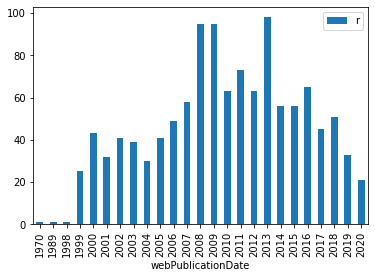

In [54]:
tb.plot.bar()

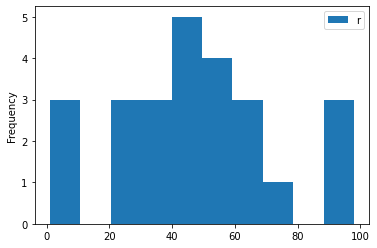

In [55]:
tb.plot.hist()

In [56]:
df

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,uk/1989/jun/14/2,article,uk-news,UK news,1989-06-14T10:26:21Z,Guardian Tomorrows: Toxicity on tap,https://www.theguardian.com/uk/1989/jun/14/2,https://content.guardianapis.com/uk/1989/jun/14/2,False,pillar/news,News
1,theguardian/1998/dec/31/features11.g2,article,global,Global,1998-12-31T04:21:18Z,They came from Kent,https://www.theguardian.com/theguardian/1998/d...,https://content.guardianapis.com/theguardian/1...,False,NaN,NaN
2,media/1999/jan/25/tvandradio.television1,article,culture,Culture,1999-01-25T04:17:17Z,Watching brief,https://www.theguardian.com/media/1999/jan/25/...,https://content.guardianapis.com/media/1999/ja...,False,pillar/arts,Arts
3,society/1999/mar/17/guardiansocietysupplement,article,society,Society,1999-03-17T02:26:08Z,Cover stories,https://www.theguardian.com/society/1999/mar/1...,https://content.guardianapis.com/society/1999/...,False,pillar/news,News
4,uk/1999/mar/20/4,article,uk-news,UK news,1999-03-20T04:06:49Z,Pity the poor aliens,https://www.theguardian.com/uk/1999/mar/20/4,https://content.guardianapis.com/uk/1999/mar/20/4,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...
1169,environment/2020/may/16/country-diary-locating...,article,environment,Environment,2020-05-16T04:30:20Z,Country diary: locating the true names for the...,https://www.theguardian.com/environment/2020/m...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
1170,tv-and-radio/2020/may/16/wind-of-change-podcas...,article,tv-and-radio,Television & radio,2020-05-16T16:00:34Z,The week in radio and podcasts: Wind of Change...,https://www.theguardian.com/tv-and-radio/2020/...,https://content.guardianapis.com/tv-and-radio/...,False,pillar/arts,Arts
1171,music/2020/may/25/from-germany-to-detroit-and-...,article,music,Music,2020-05-25T07:22:06Z,From Germany to Detroit and back: how Kraftwer...,https://www.theguardian.com/music/2020/may/25/...,https://content.guardianapis.com/music/2020/ma...,False,pillar/arts,Arts
1172,world/live/2020/jun/25/coronavirus-live-news-w...,liveblog,world,World news,2020-06-25T23:33:46Z,More than 9.5m Covid-19 cases worldwide – as i...,https://www.theguardian.com/world/live/2020/ju...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News


In [58]:
df.to_csv('ufo.csv', index=True)

In [65]:
import sqlite3
con = sqlite3.connect('ufo.db')
df.to_sql('ufo_table2', con)
con.close()